In [97]:
import pandas as pd
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff596745d30>]],
      dtype=object)

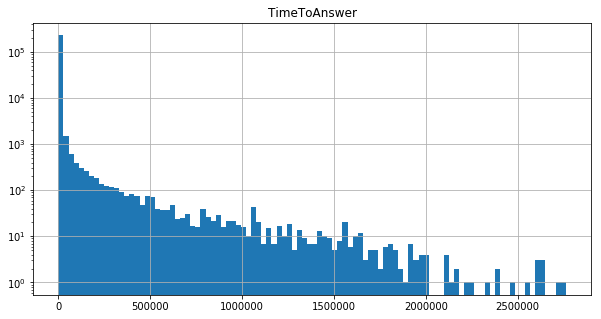

In [79]:
df = pd.read_csv('encodedFull.csv')
df = df.fillna(0)
#Drop 0 time to answer row as these are in error
df = df[df['TimeToAnswer'] >= 0]
df['Downvoted'] = np.where((df['Downvotes'] > 5) & (df['Downvotes'] / df['Votes'] > 0.1), 1, 0)
df['AnsweredInHour'] = np.where(((df['TimeToAnswer'] > 0) & (df['TimeToAnswer'] <= 60)), 1, 0)
hist = df.hist(column='TimeToAnswer', bins=100, log=True)
hist

In [44]:
df.columns

Index(['c++', 'c++11', 'qt', 'templates', 'visual-c++', 'boost', 'arrays',
       'pointers', 'vector', 'windows', 'winapi', 'stl', 'multithreading',
       'string', 'opencv', 'linux', 'class', 'opengl', 'gcc', 'visual-studio',
       'algorithm', 'inheritance', 'visual-studio-2010', 'function', 'mfc',
       'java', 'c++14', 'g++', 'dll', 'python', 'operator-overloading',
       'struct', 'c++-cli', 'oop\t3307', 'memory-management', 'iterator',
       'performance', 'cmake', 'memory', 'linker', 'sockets', 'reference',
       'compiler-errors', 'language-lawyer', 'macos', 'const', 'std', 'lambda',
       'file', 'debugging', 'reputation', 'Votes', 'Downvotes', 'LinkType',
       'TimeToAnswer', 'Question Body Char Count', 'Question Body Word Count',
       'Question Title Char Count', 'Question Title Word Count',
       'Question creation date', 'Title end in ?', 'Answer creation date',
       'Downvoted', 'LogTime'],
      dtype='object')

In [101]:
df.describe()

,c++,c++11,qt,templates,visual-c++,boost,arrays,pointers,vector,windows,...,Downvotes,LinkType,TimeToAnswer,Question Body Char Count,Question Body Word Count,Question Title Char Count,Question Title Word Count,Title end in ?,Downvoted,AnsweredInHour
count,235626.000000,235626.000000,235626.000000,235626.000000,235626.000000,235626.000000,235626.000000,235626.000000,235626.000000,235626.000000,...,235626.000000,235626.000000,2.356260e+05,235626.00000,235626.000000,235626.000000,235626.000000,235626.000000,235626.000000,235626.000000
mean,0.881045,0.091127,0.047359,0.041731,0.018296,0.023720,0.034822,0.025451,0.020575,0.019489,...,76.614134,0.416338,7.036007e+03,1620.58797,270.572823,53.050618,8.608082,0.736222,0.124693,0.653022
std,0.323737,0.287791,0.212406,0.199975,0.134020,0.152175,0.183329,0.157492,0.141957,0.138235,...,806.858790,0.653476,7.214282e+04,1808.16732,382.848733,20.166380,3.607876,0.440681,0.330372,0.476010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,43.00000,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.000000e+00,678.00000,95.000000,38.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.300000e+01,1127.00000,167.000000,50.000000,8.000000,1.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,1.000000,1.270000e+02,1902.00000,302.000000,64.000000,11.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,49976.000000,3.000000,2.761792e+06,34864.00000,18899.000000,150.000000,32.000000,1.000000,1.000000,1.000000


In [80]:
df

,c++,c++11,qt,templates,visual-c++,boost,arrays,pointers,vector,windows,...,TimeToAnswer,Question Body Char Count,Question Body Word Count,Question Title Char Count,Question Title Word Count,Question creation date,Title end in ?,Answer creation date,Downvoted,AnsweredInHour
0,0,0,0,0,0,0,0,0,0,0,...,20.0,1365,265,54,11,2013-10-01T00:00:25.877,1,2013-10-01 00:20:53,0,1
1,1,0,0,0,0,0,0,0,0,1,...,125151.0,2171,315,39,5,2013-10-01T00:24:06.080,1,2013-12-26 22:15:56,0,0
2,1,0,0,0,0,0,0,0,0,0,...,23.0,96,18,47,7,2013-10-01T00:26:41.727,1,2013-10-01 00:49:45,0,1
3,1,0,0,0,0,0,0,0,0,0,...,62.0,18173,2816,71,11,2013-10-01T00:54:47.893,1,2013-10-01 01:56:55,0,0
4,1,0,0,0,0,0,0,0,0,0,...,45.0,540,102,31,5,2013-10-01T00:55:06.187,1,2013-10-01 01:40:14,0,1
5,1,0,0,0,0,0,0,0,0,0,...,16.0,1601,231,46,8,2013-10-01T01:04:57.230,1,2013-10-01 01:21:33,0,1
6,1,0,0,0,0,0,1,0,0,0,...,6.0,1017,180,29,5,2013-10-01T01:13:15.540,1,2013-10-01 01:19:51,0,1
7,0,0,0,0,0,0,0,0,0,0,...,10.0,645,135,54,8,2013-10-01T01:17:02.357,1,2013-10-01 01:27:31,0,1
8,1,0,0,0,0,0,0,0,0,0,...,2.0,679,63,37,4,2013-10-01T01:36:19.910,1,2013-10-01 01:38:56,1,1
9,1,0,0,0,0,0,0,0,0,0,...,540.0,895,134,40,5,2013-10-01T01:40:17.400,1,2013-10-01 10:41:00,0,0


In [81]:
out = stats.pointbiserialr(df['Downvoted'], df['AnsweredInHour'])
out

PointbiserialrResult(correlation=-0.013181811046727256, pvalue=1.5653159124838936e-10)

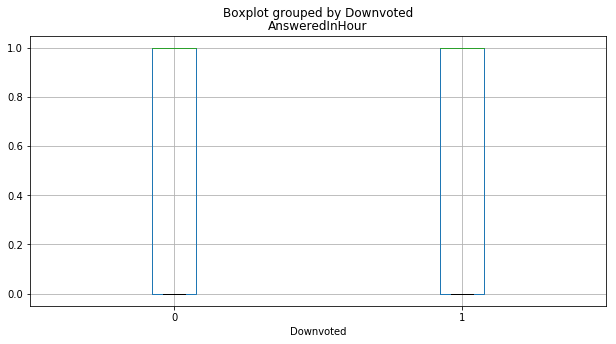

In [84]:
boxplot = df.boxplot(column='AnsweredInHour', by='Downvoted', showfliers=False)

In [85]:
neg = df[df['Downvoted'] == 0]
pos = df[df['Downvoted'] == 1]
print(neg['AnsweredInHour'].mean())
print(pos['AnsweredInHour'].mean())

0.6553904337074838
0.6363976719648753


In [86]:
features = df.drop(['Question creation date', 'Answer creation date', 'TimeToAnswer', 'AnsweredInHour'], axis=1)
labels = df['AnsweredInHour']

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25)

Here we initialize the Random Forest Model and train it on our training set.

In [99]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [100]:
predictions = rf.predict(test_features)

print("Accuracy:", metrics.accuracy_score(test_labels, predictions))

Accuracy: 0.7304395063405028
